In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import save_model
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation
from keras.layers.core import Flatten
from keras.optimizers import Adam
from keras.datasets import mnist
import pandas as pd

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
# Load train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Number of classes
noOfClasses = 10

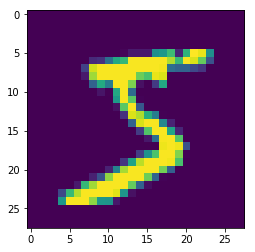

In [5]:
# Show image by index
index = 0
plt.imshow(X_train[index])

In [6]:
# Define function to preprocess image
def preProcessing(img):
    img = img / 255.0
    return img

In [7]:
# Preprocess all images
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))

In [8]:
# Add depth of one
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [9]:
# One hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [10]:
# Image dimension
imageDimension = (28, 28, 1)

In [11]:
# Create model
def myModel():
    noOfFilters = 32
    sizeOfFilter1 = (5, 5)
    sizeOfFilter2 = (3, 3)
    sizeOfPoll = (2, 2)
    noOfNodes = 64
    
    # Create sequential model
    model = Sequential()
    
    # First conv + maxpoll layer
    model.add(Conv2D(noOfFilters, sizeOfFilter1, padding='same',
                      input_shape = (imageDimension[0], imageDimension[1], 1)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = sizeOfPoll))
    
    # Second conv + maxpool layer
    model.add(Conv2D(noOfFilters, sizeOfFilter2, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = sizeOfPoll))
    
    # First FC layer
    model.add(Flatten())
    model.add(Dense(noOfNodes, activation = "relu"))
    model.add(Dropout(0.5))
    
    # Second FC layer
    model.add(Dense(noOfNodes, activation="relu"))
    model.add(Dropout(0.5))
    
    #Output layer
    model.add(Dense(noOfClasses, activation = "softmax"))
    
    model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return model


In [12]:
# Get model
model = myModel()

In [13]:
# Fit model and save it
history = model.fit(X_train, y_train,  
                              validation_data=(X_test, y_test),
                              batch_size=128,
                              epochs=10,
                              verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s 639us/step - loss: 0.6887 - accuracy: 0.7687 - val_loss: 0.0807 - val_accuracy: 0.9758
Epoch 2/10
60000/60000 [==============================] - 38s 638us/step - loss: 0.2527 - accuracy: 0.9261 - val_loss: 0.0620 - val_accuracy: 0.9820
Epoch 3/10
60000/60000 [==============================] - 38s 637us/step - loss: 0.1848 - accuracy: 0.9465 - val_loss: 0.0451 - val_accuracy: 0.9863
Epoch 4/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.1572 - accuracy: 0.9540 - val_loss: 0.0423 - val_accuracy: 0.9864
Epoch 5/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.1372 - accuracy: 0.9590 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 6/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.1257 - accuracy: 0.9631 - val_loss: 0.0331 - val_accuracy: 0.9899
Epoch 7/10
60000/60000 [==============================] 

In [14]:
# model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [15]:
# Score and accuracy on test set
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.026459240649622826, 0.9921000003814697]

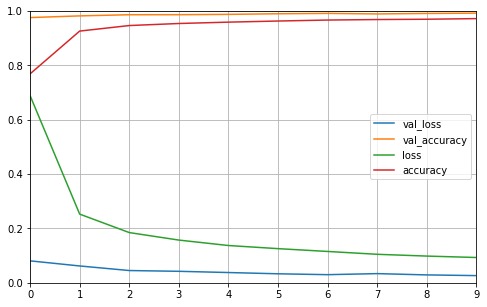

In [16]:
# Draw train and validation loss and accuracy
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
save_model(model, "model.h5")